## Contents & Analysis for income sources:

* dynamic web chart analyzes in detail all sources of income and the percentage of each source and highlights the source with the highest value.
* a Creative Doughnut chart showing the achieved percentage from the target.
* dashboard title and description
* Total Income amount and the target
* a line chart Income by months
* Total counts and percentage of Income Sources items.
* Average of monthly income 
* a Bar chart showing the Monthly operating profits and the total amount
* analyzing for two types of Marketing strategies. 

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [4]:
df = pd.read_excel(r'C:\Users\osakue\Desktop\PROJECT DATA\DASHBOARD AND ANALYSIS\financial statistics.xlsx')

In [5]:
df.head()

,Year,Month,Income sources,Income Breakdowns,Counts,Income,Target Income,operating profit,Marketing Strategies
0,2020,Jan,Licensing,Software Metered License,3566.0,5492.76,5126.576,1098.552,B2B
1,2020,Jan,Licensing,Floating License,2498.0,9600.00,8960.000,1920.000,B2B
2,2020,Jan,Renting,Equipments,1245.0,5492.64,5126.464,1098.528,B2B
3,2020,Jan,Subscription,Prime,644.0,6892.20,6432.720,1378.440,B2B
4,2020,Jan,Usage fees,Renewal,643.0,7700.00,7840.000,1540.000,B2B


In [6]:
df.shape

(900, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  900 non-null    int64  
 1   Month                 900 non-null    object 
 2   Income sources        900 non-null    object 
 3   Income Breakdowns     900 non-null    object 
 4   Counts                900 non-null    float64
 5   Income                900 non-null    float64
 6   Target Income         900 non-null    float64
 7   operating profit      900 non-null    float64
 8   Marketing Strategies  900 non-null    object 
dtypes: float64(4), int64(1), object(4)
memory usage: 63.4+ KB


In [8]:
df.describe()

,Year,Counts,Income,Target Income,operating profit
count,900.000,900.000000,900.000000,900.000000,900.000000
mean,2022.000,811.274664,4385.908606,5017.618071,877.181721
std,1.415,1416.975628,2714.467000,2729.136233,542.893400
min,2020.000,2.000000,100.000000,112.000000,20.000000
25%,2021.000,34.000000,2288.600000,5126.016000,457.720000
50%,2022.000,122.000000,4577.300000,5126.576000,915.460000
75%,2023.000,644.000000,6600.000000,7392.000000,1320.000000
max,2024.000,10368.400000,22000.000000,12480.000000,4400.000000


In [9]:
df.head(2)

,Year,Month,Income sources,Income Breakdowns,Counts,Income,Target Income,operating profit,Marketing Strategies
0,2020,Jan,Licensing,Software Metered License,3566.0,5492.76,5126.576,1098.552,B2B
1,2020,Jan,Licensing,Floating License,2498.0,9600.00,8960.000,1920.000,B2B


# All sources of income and the percentage of each source and highlighting the 5 highest source

In [10]:
df['Income sources'].value_counts()

Advertising     300
Renting         180
Licensing       120
Subscription    120
Usage fees      120
Asset sale       60
Name: Income sources, dtype: int64

In [11]:
round(df.groupby('Income sources' )['Income'].mean())

Income sources
Advertising     3028.0
Asset sale      6612.0
Licensing       6468.0
Renting         1708.0
Subscription    5762.0
Usage fees      7227.0
Name: Income, dtype: float64

In [12]:
sum_of_mean = round(df.groupby('Income sources')['Income'].mean().sum())

In [13]:
percentage_income_per_income_source = round((df.groupby('Income sources' )['Income'].mean()/sum_of_mean)*100)

In [14]:
five_highest_income_source=percentage_income_per_income_source.sort_values(ascending= False).head(5)

five_highest_income_source

Income sources
Usage fees      23.0
Asset sale      21.0
Licensing       21.0
Subscription    19.0
Advertising     10.0
Name: Income, dtype: float64

<Figure size 864x432 with 0 Axes>

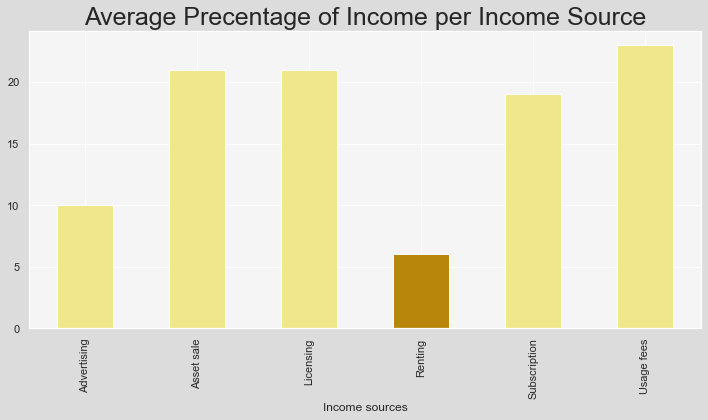

In [23]:
plt.figure()
highest_source=plt.figure(figsize=(12,6))
plt.title('Average Precentage of Income per Income Source', fontsize=25)
percentage_income_per_income_source.plot(kind='bar', figsize=(10,6), 
                                         color =['khaki','khaki','khaki','darkgoldenrod','khaki','khaki']);

# Creative Doughnut chart showing the achieved percentage from the target.

In [25]:
df.sample(2)

,Year,Month,Income sources,Income Breakdowns,Counts,Income,Target Income,operating profit,Marketing Strategies
881,2024,Nov,Advertising,Youtube Channel,34.0,4576.8,5126.016,915.36,B2C
404,2022,Mar,Asset sale,Asset sale,2.0,6600.0,7392.000,1320.00,B2C


In [26]:
df1=round(df.groupby('Income sources' )[['Income', 'Target Income']].mean())

In [27]:
df1=df1.reset_index()

In [28]:
df1['Achieved percentage']=round(df1['Income']/df1['Target Income']*100)

In [29]:
df1.head(1)

,Income sources,Income,Target Income,Achieved percentage
0,Advertising,3028.0,4146.0,73.0


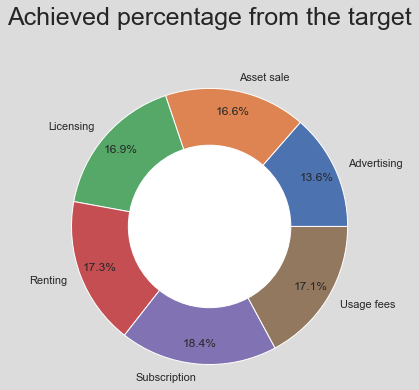

In [30]:
achieved_percentage=plt.title('Achieved percentage from the target', pad=100, fontsize = 25)
plt.pie(df1["Achieved percentage"], labels = df1["Income sources"], radius=1.7,pctdistance=0.85, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 1, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle);

# Total Income amount and the target

In [31]:
df.head(1)

,Year,Month,Income sources,Income Breakdowns,Counts,Income,Target Income,operating profit,Marketing Strategies
0,2020,Jan,Licensing,Software Metered License,3566.0,5492.76,5126.576,1098.552,B2B


In [32]:
df2=df.groupby('Income sources' )[['Income', 'Target Income']].sum().reset_index()
df2.head(1)

,Income sources,Income,Target Income
0,Advertising,908441.7,1243751.04


In [33]:
df22=df2.melt(id_vars='Income sources')
df22

,Income sources,variable,value
0,Advertising,Income,908441.700
1,Asset sale,Income,396733.800
2,Licensing,Income,776132.815
3,Renting,Income,307374.010
4,Subscription,Income,691419.420
5,Usage fees,Income,867216.000
6,Advertising,Target Income,1243751.040
7,Asset sale,Target Income,446424.000
8,Licensing,Target Income,850728.572
9,Renting,Target Income,329805.808


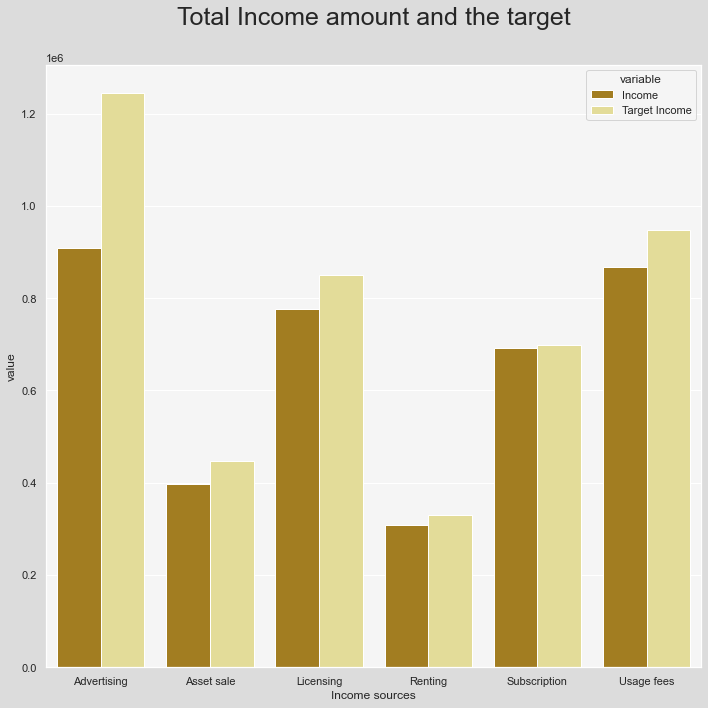

In [34]:
plt.figure(figsize=(10,10))
plt.title('Total Income amount and the target', fontsize=25, pad=40)
sns.barplot(x='Income sources',y='value', hue='variable', palette=["darkgoldenrod", "khaki"], data=df22);


#  Line chart Income by months in 2022 & 2021

In [35]:
df.head(1)

,Year,Month,Income sources,Income Breakdowns,Counts,Income,Target Income,operating profit,Marketing Strategies
0,2020,Jan,Licensing,Software Metered License,3566.0,5492.76,5126.576,1098.552,B2B


In [36]:
df['date']= df["Month"] + df["Year"].astype(str)

In [37]:
df['date']= pd.to_datetime(df.date, format='%b%Y')

In [38]:
df.sample(2)

,Year,Month,Income sources,Income Breakdowns,Counts,Income,Target Income,operating profit,Marketing Strategies,date
315,2021,Oct,Licensing,Software Metered License,3566.0,4577.3,5126.576,915.46,B2C,2021-10-01
370,2022,Jan,Advertising,Company Website,46.0,100.0,224.000,20.00,B2C,2022-01-01


In [39]:
z1=df.groupby('date')['Income'].mean()['2021']

In [40]:
z2=df.groupby('date')['Income'].mean()['2022']

In [41]:
zz1=pd.DataFrame(z1)

In [42]:
zz2=pd.DataFrame(z2)

In [43]:
zz1.reset_index().head(1)

,date,Income
0,2021-01-01,4736.163333


In [44]:
zz2.reset_index().head(1)

,date,Income
0,2022-01-01,4328.978


In [45]:
zz1['months']=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [46]:
zz2['months']=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [47]:
zz1.head(1)

,Income,months
date,,
2021-01-01,4736.163333,Jan


In [48]:
zz2.head(1)

,Income,months
date,,
2022-01-01,4328.978,Jan


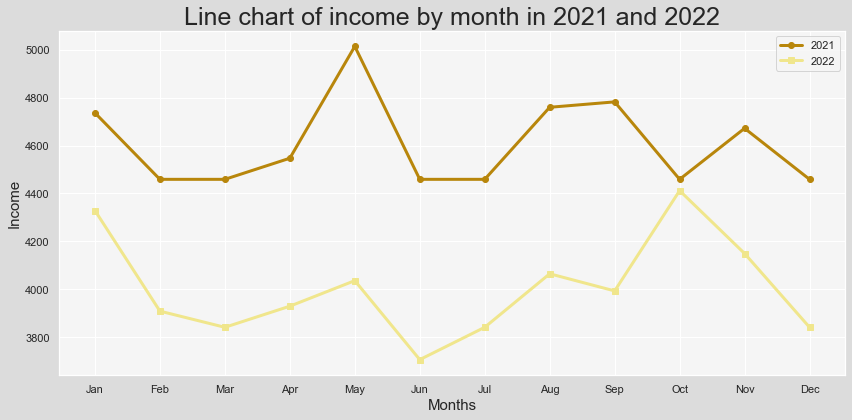

In [49]:


plt.figure(figsize=(12,6))
plt.title('Line chart of income by month in 2021 and 2022', fontsize=25)
plt.plot(zz1['months'], zz1['Income'], marker='o', c='darkgoldenrod', ls='-', lw=3);
plt.plot(zz2['months'], zz2['Income'], marker='s', c='khaki', ls='-', lw=3);
plt.xlabel('Months', fontsize=15)
plt.ylabel('Income', fontsize=15);
plt.legend(['2021', '2022']);

# Bar chart showing the Monthly operating profits and the total amount

In [50]:
df.head(1)

,Year,Month,Income sources,Income Breakdowns,Counts,Income,Target Income,operating profit,Marketing Strategies,date
0,2020,Jan,Licensing,Software Metered License,3566.0,5492.76,5126.576,1098.552,B2B,2020-01-01


In [51]:
df4=df.groupby('Income sources')[['Income', 'operating profit']].sum().reset_index()
df4

,Income sources,Income,operating profit
0,Advertising,908441.700,181688.340
1,Asset sale,396733.800,79346.760
2,Licensing,776132.815,155226.563
3,Renting,307374.010,61474.802
4,Subscription,691419.420,138283.884
5,Usage fees,867216.000,173443.200


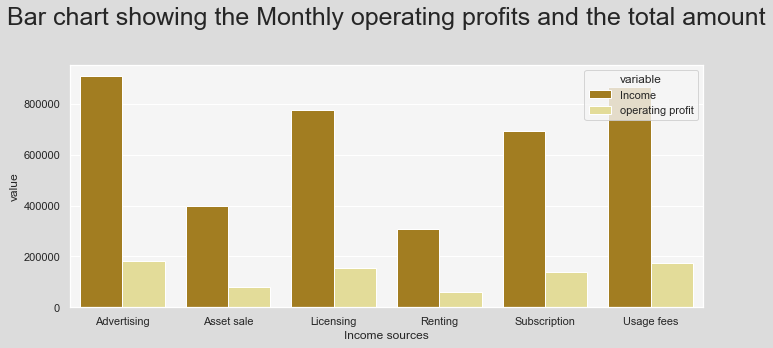

In [52]:
df44=df4.melt(id_vars='Income sources')
plt.figure(figsize=(10,5))
plt.title('Bar chart showing the Monthly operating profits and the total amount', fontsize=25, pad=40)
sns.barplot(x='Income sources',y='value', hue='variable', palette=["darkgoldenrod", "khaki"], data=df44);


# Types of Marketing strategies by percentage profit

In [53]:
df.head(1)

,Year,Month,Income sources,Income Breakdowns,Counts,Income,Target Income,operating profit,Marketing Strategies,date
0,2020,Jan,Licensing,Software Metered License,3566.0,5492.76,5126.576,1098.552,B2B,2020-01-01


In [54]:
df6=pd.DataFrame(df['Marketing Strategies'].value_counts())

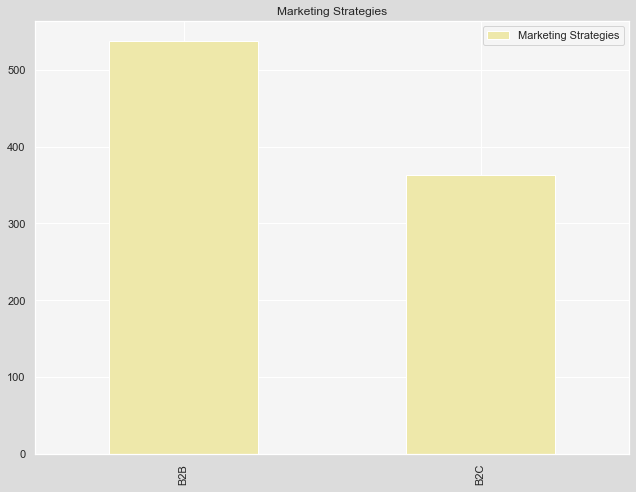

In [55]:
#analyzing for two types of Marketing strategies

df6.plot(kind='bar', figsize=(9,7), title=('Marketing Strategies'), color=['palegoldenrod']);

In [56]:
dfp=round(df.groupby('Marketing Strategies')['operating profit'].sum()/df['operating profit'].sum()*100)

In [57]:
dfp

Marketing Strategies
B2B    60.0
B2C    40.0
Name: operating profit, dtype: float64

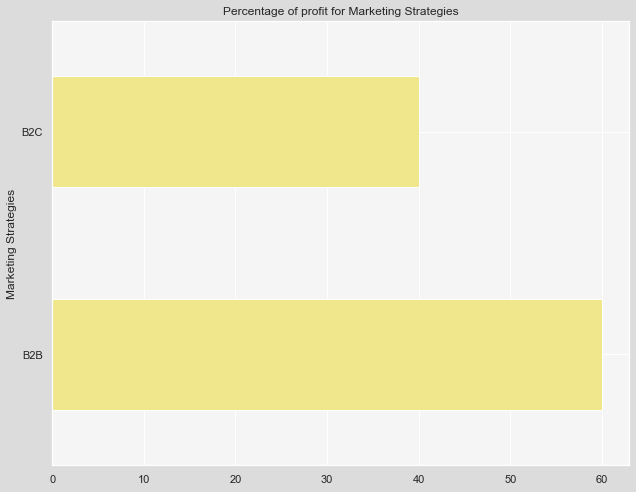

In [58]:
dfp.plot(kind='barh', figsize=(9,7), title=('Percentage of profit for Marketing Strategies'), color=["khaki"]);

# The average income, target income and operating profit 

In [59]:
df.head(1)

,Year,Month,Income sources,Income Breakdowns,Counts,Income,Target Income,operating profit,Marketing Strategies,date
0,2020,Jan,Licensing,Software Metered License,3566.0,5492.76,5126.576,1098.552,B2B,2020-01-01


In [60]:
df11=pd.DataFrame(df.groupby('Income sources')[['Income','Target Income','operating profit']].mean())
df11

,Income,Target Income,operating profit
Income sources,,,
Advertising,3028.139000,4145.836800,605.627800
Asset sale,6612.230000,7440.400000,1322.446000
Licensing,6467.773458,7089.404767,1293.554692
Renting,1707.633389,1832.254489,341.526678
Subscription,5761.828500,5818.223700,1152.365700
Usage fees,7226.800000,7891.333333,1445.360000


In [61]:
df11=df11.reset_index()

In [62]:
df11

,Income sources,Income,Target Income,operating profit
0,Advertising,3028.139000,4145.836800,605.627800
1,Asset sale,6612.230000,7440.400000,1322.446000
2,Licensing,6467.773458,7089.404767,1293.554692
3,Renting,1707.633389,1832.254489,341.526678
4,Subscription,5761.828500,5818.223700,1152.365700
5,Usage fees,7226.800000,7891.333333,1445.360000


In [63]:
qw=df11.drop(['Income'], axis=1)
qw

,Income sources,Target Income,operating profit
0,Advertising,4145.836800,605.627800
1,Asset sale,7440.400000,1322.446000
2,Licensing,7089.404767,1293.554692
3,Renting,1832.254489,341.526678
4,Subscription,5818.223700,1152.365700
5,Usage fees,7891.333333,1445.360000


In [64]:
qw['income']=df11['Income']
df8=qw.melt(id_vars='Income sources')
df8

,Income sources,variable,value
0,Advertising,Target Income,4145.836800
1,Asset sale,Target Income,7440.400000
2,Licensing,Target Income,7089.404767
3,Renting,Target Income,1832.254489
4,Subscription,Target Income,5818.223700
5,Usage fees,Target Income,7891.333333
6,Advertising,operating profit,605.627800
7,Asset sale,operating profit,1322.446000
8,Licensing,operating profit,1293.554692
9,Renting,operating profit,341.526678


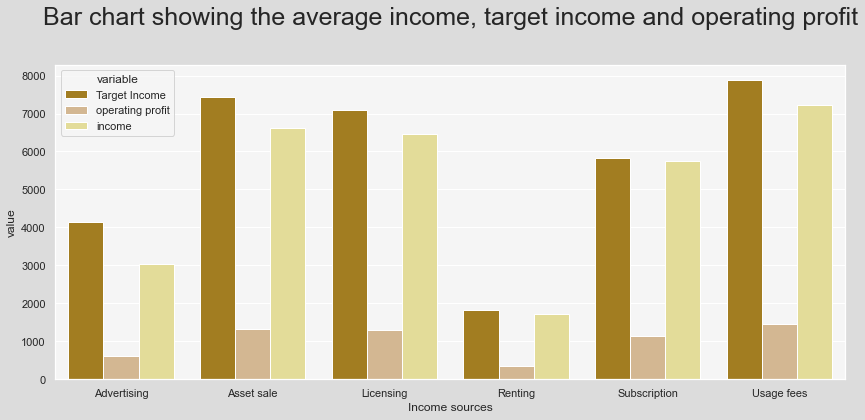

In [65]:
plt.figure(figsize=(12,6))
plt.title('Bar chart showing the average income, target income and operating profit', fontsize=25, pad=40)
sns.barplot(x='Income sources',y='value', hue='variable', palette=["darkgoldenrod","burlywood", "khaki"], data=df8);


# 

#                      DASHBOARD 

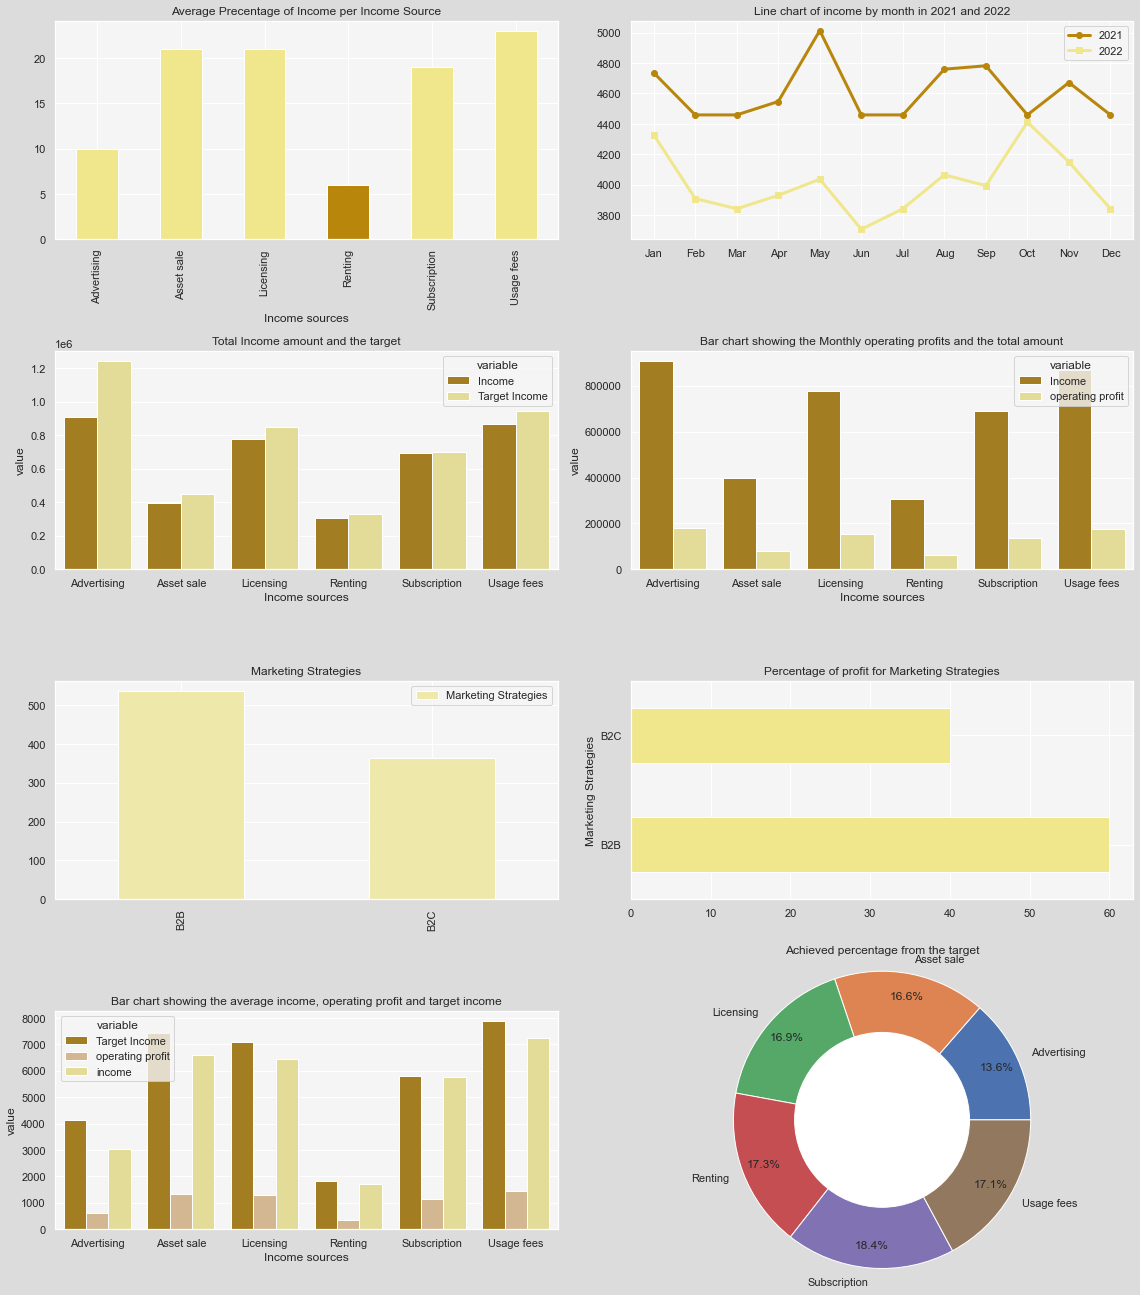

In [70]:
fig, axes = plt.subplots(4, 2, figsize=(16, 18),)
sns.set(rc={'axes.facecolor':'whitesmoke', 'figure.facecolor':'gainsboro'})
grid=False
plt.subplots_adjust(wspace=0.2,
                    top=0.9, 
                    hspace=0.6)

axes[0,0].set_title('Average Precentage of Income per Income Source');
percentage_income_per_income_source.plot(kind='bar', color =['khaki','khaki','khaki','darkgoldenrod','khaki','khaki'], ax=axes[0,0]);

axes[1,1].set_title('Bar chart showing the Monthly operating profits and the total amount')
sns.barplot(x='Income sources',y='value', hue='variable', palette=["darkgoldenrod", "khaki"], ax=axes[1,1], data=df44);

axes[1,0].set_title('Total Income amount and the target')
sns.barplot(x='Income sources',y='value', hue='variable', palette=["darkgoldenrod", "khaki"], data=df22, ax=axes[1,0]);

axes[0,1].set_title('Line chart of income by month in 2021 and 2022')
axes[0,1].plot(zz1['months'], zz1['Income'], marker='o', c='darkgoldenrod', ls='-', lw=3);
axes[0,1].plot(zz2['months'], zz2['Income'], marker='s', c='khaki', ls='-', lw=3);
axes[0,1].legend(['2021', '2022']);

axes[2,0].set_title('Marketing Strategies')
df6.plot(kind='bar', color=['palegoldenrod'], ax=axes[2,0]);

axes[2,1].set_title('Percentage of profit for Marketing Strategies')
dfp.plot(kind='barh', color=["khaki"], ax=axes[2,1]);

axes[3,0].set_title('Bar chart showing the average income, operating profit and target income')
sns.barplot(x='Income sources',y='value', hue='variable', palette=["darkgoldenrod","burlywood", "khaki"], data=df8, ax=axes[3,0]);


axes[3,1].set_title('Achieved percentage from the target', pad=57)
axes[3,1].pie(df1["Achieved percentage"], labels = df1["Income sources"], radius=1.7,pctdistance=0.85, autopct='%1.1f%%');
centre_circle = plt.Circle((0, 0), 1, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle);
